In [1]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt

In [2]:
chroma_client = chromadb.PersistentClient(path="vectordb")

In [6]:
# Instantiate image loader helper.
image_loader = ImageLoader()

# Instantiate multimodal embedding function.
multimodal_ef = OpenCLIPEmbeddingFunction()

open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [69]:
multimodal_db = chroma_client.get_or_create_collection(name="multimodal_db", embedding_function=multimodal_ef,
                                                       data_loader=image_loader)

In [ ]:
#Example
# multimodal_db.add(
#     ids=['0', '1'],
#     uris=['images/lion.jpg', 'images/tiger.jpg'],
#     metadatas=[{'img_category': 'animals'}, {'img_category': 'animals'}]
# )
# delete the collection
# chroma_client.delete_collection("multimodal_db")

In [71]:
import os


def get_img_files():
    img_files = []
    for file in os.listdir("Brand1"):
        if file.endswith(".jpg"):
            img_files.append(file)
    return img_files


len(get_img_files()), get_img_files()

(352,
 ['15233-001 (1).jpg',
  '15233-001 (2).jpg',
  '15233-001 (3).jpg',
  '15233-001 (4).jpg',
  '15233-001 (5).jpg',
  '16002-317 (1).jpg',
  '16002-317 (2).jpg',
  '16002-317 (3).jpg',
  '16002-317 (4).jpg',
  '16002-317 (5).jpg',
  '16002-318 (1).jpg',
  '16002-318 (2).jpg',
  '16002-318 (3).jpg',
  '16002-318 (4).jpg',
  '16002-318 (5).jpg',
  '17665-011 (1).jpg',
  '17665-011 (2).jpg',
  '17665-011 (3).jpg',
  '17665-011 (4).jpg',
  '17665-011 (5).jpg',
  '20848-017 (1).jpg',
  '20848-017 (2).jpg',
  '20848-017 (3).jpg',
  '20848-017 (4).jpg',
  '20848-017 (5).jpg',
  '27205-277 (1).jpg',
  '27205-277 (2).jpg',
  '27205-277 (3).jpg',
  '27205-277 (4).jpg',
  '27205-277 (5).jpg',
  '27205-286 (1).jpg',
  '27205-286 (2).jpg',
  '27205-286 (3).jpg',
  '27205-286 (4).jpg',
  '27205-286 (5).jpg',
  'K100249-012 (1).jpg',
  'K100249-012 (2).jpg',
  'K100249-012 (3).jpg',
  'K100249-012 (4).jpg',
  'K100249-012 (5).jpg',
  'K100360-032 (1).jpg',
  'K100360-032 (2).jpg',
  'K100360-032

In [74]:
import re
for i, img_file in enumerate(get_img_files()):
    img_id = str(i)
    metadata_match = re.match(r'(.+?)(\(\d+\))?\.(\w+)', img_file)
    if metadata_match:
        metadata = metadata_match.group(1).replace(" ", "")
    else:
        metadata = img_file.split(".")[0].replace(" ", "")
    img_uri = f"Brand1/{img_file}"
    img_metadata = {"filename": metadata}
    print(img_id, metadata)
    multimodal_db.add(ids=[img_id], uris=[img_uri], metadatas=[img_metadata])

0 {'filename': '15233-001'}
1 {'filename': '15233-001'}
2 {'filename': '15233-001'}
3 {'filename': '15233-001'}
4 {'filename': '15233-001'}
5 {'filename': '16002-317'}
6 {'filename': '16002-317'}
7 {'filename': '16002-317'}
8 {'filename': '16002-317'}
9 {'filename': '16002-317'}
10 {'filename': '16002-318'}
11 {'filename': '16002-318'}
12 {'filename': '16002-318'}
13 {'filename': '16002-318'}
14 {'filename': '16002-318'}
15 {'filename': '17665-011'}
16 {'filename': '17665-011'}
17 {'filename': '17665-011'}
18 {'filename': '17665-011'}
19 {'filename': '17665-011'}
20 {'filename': '20848-017'}
21 {'filename': '20848-017'}
22 {'filename': '20848-017'}
23 {'filename': '20848-017'}
24 {'filename': '20848-017'}
25 {'filename': '27205-277'}
26 {'filename': '27205-277'}
27 {'filename': '27205-277'}
28 {'filename': '27205-277'}
29 {'filename': '27205-277'}
30 {'filename': '27205-286'}
31 {'filename': '27205-286'}
32 {'filename': '27205-286'}
33 {'filename': '27205-286'}
34 {'filename': '27205-2

In [75]:
# Check record count
multimodal_db.count()

352

In [27]:
def print_query_results(query_list: list, query_results: dict) -> None:
    result_count = len(query_results['ids'][0])
    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')
        for j in range(result_count):
            id = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri = query_results['uris'][i][j]
            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}')
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: socks
id: 19, distance: 1.3761656284332275, metadata: {'img_category': '17665-011 (5)'}, document: None
data: Brand1/17665-011 (5).jpg


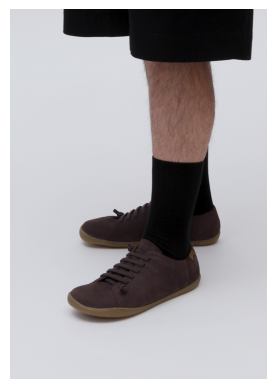

id: 89, distance: 1.3796093463897705, metadata: {'img_category': 'K100864-007 (5)'}, document: None
data: Brand1/K100864-007 (5).jpg


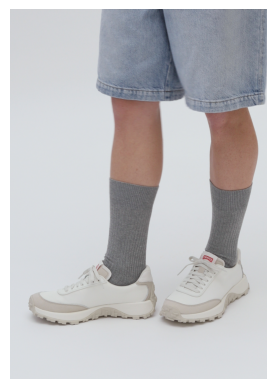

In [52]:
query_texts = ['socks']

# Query vector db
query_results = multimodal_db.query(
    query_texts=query_texts,
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)

print_query_results(query_texts, query_results)

Results for query: Brand1/16002-318 (2).jpg
id: 26, distance: 0.1118430495262146, metadata: {'filename': '27205-277'}, document: None
data: Brand1/27205-277 (2).jpg


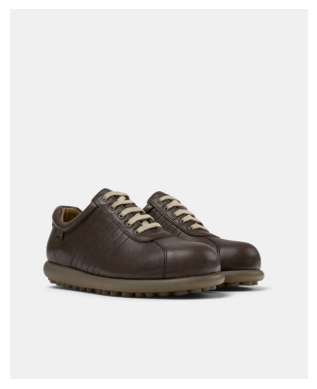

id: 25, distance: 0.22848792374134064, metadata: {'filename': '27205-277'}, document: None
data: Brand1/27205-277 (1).jpg


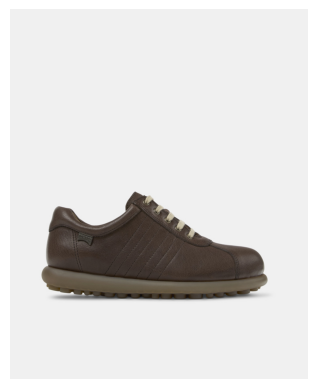

In [76]:
from PIL import Image
query_image = 'Brand1/16002-318 (2).jpg'
uri = query_image.split("/")[1]
code = uri.split("(")[0].replace(" ", "")
query_results = multimodal_db.query(
    query_uris=[query_image],
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'filename': {'$ne': code}}
)
print_query_results([query_image], query_results)

In [77]:
#Additionally, if a data loader is set for the collection, and URIs are available, you can include the data in the results:

# results = collection.query(
#     query_images=[...], # # list of numpy arrays representing images
#     includes=['data']
# )
# 
# This will automatically call the data loader for any available URIs, and include the data in the results. uris are also available as an includes field.

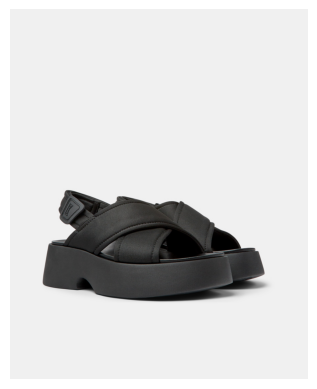

In [83]:
image_uri ="Brand1/K201610-001 (2).jpg"
image = Image.open(image_uri)
plt.imshow(image)
plt.axis("off")
plt.show()

Results for query: Brand1/K201610-001 (2).jpg
id: 14, distance: 1.5083062648773193, metadata: {'filename': '16002-318'}, document: None
data: Brand1/16002-318 (5).jpg


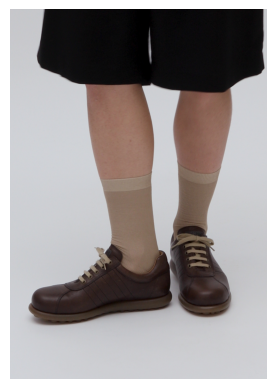

id: 29, distance: 1.522281289100647, metadata: {'filename': '27205-277'}, document: None
data: Brand1/27205-277 (5).jpg


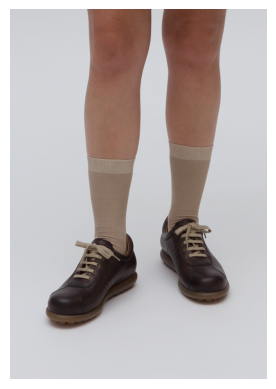

In [85]:
query_images = [image_uri]

query_results = multimodal_db.query(
    query_images=query_images,
    n_results=2,
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
)
print_query_results(query_images, query_results)